<a href="https://colab.research.google.com/github/panda1835/youtube-hunting/blob/main/04-Data-Analysis/01_video-content-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download utilized scripts
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/Utils/utils.py
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/04-Data-Analysis/src/data_analysis_utils.py

In [23]:
import pandas as pd
import numpy as np
import json 
import os
from tqdm import tqdm
import importlib
from time import sleep 

import matplotlib.pyplot as plt

# import utilized scripts
import utils as utils
import data_analysis_utils as dautils

In [26]:
importlib.reload(utils)
importlib.reload(dautils)

<module 'data_analysis_utils' from '/content/data_analysis_utils.py'>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
root = "/content/drive/My Drive/Let-Hunt-Youtube/"
config_file_path = os.path.join(root, 'config.json')

config = json.load(open(config_file_path))

database_save_folder = config['folder']['database']
visualization_save_folder = config['folder']['data-analysis']
visualization_content_save_folder = config['folder']['data-analysis-content']

video_url_db_50_file_name = config['database']['video_url_50']
video_url_db_50_annotation_file_name = config['database']['video_url_50_annotation']

video_url_db_50_file_path = os.path.join(root, database_save_folder, video_url_db_50_file_name)
video_url_db_50_annotation_file_path = os.path.join(root, database_save_folder, video_url_db_50_annotation_file_name)
visualization_folder_path = os.path.join(root, visualization_save_folder, visualization_content_save_folder)

In [7]:
data = pd.read_csv(video_url_db_50_annotation_file_path)
utils.display_table(data)

,video_url,comment_sheet_name,seller_showcase_only,seller_showcase_with_dead_animal,seller_demo_no_killing,seller_demo_has_killing,non_seller_has_killing,non_seller_no_killing,rifle_type,accessories,Note
0,https://www.youtube.com/watch?v=0lAyOWJmESk,video00001,x,NaN,NaN,NaN,NaN,NaN,FX,NaN,NaN
1,https://www.youtube.com/watch?v=wQiJKW13eJ0,video00002,NaN,NaN,NaN,x,NaN,NaN,"Benjamin, Condor",NaN,NaN
2,https://www.youtube.com/watch?v=WcGmh2H9e2c,video00003,x,NaN,NaN,NaN,NaN,NaN,Condor,NaN,NaN
3,https://www.youtube.com/watch?v=vemeEExW6rY,video00004,x,NaN,NaN,NaN,NaN,NaN,NaN,ống nhắm,NaN
4,https://www.youtube.com/watch?v=jLwI-9KUQGM,video00005,x,NaN,NaN,NaN,NaN,NaN,NaN,ống nhắm,NaN
5,https://www.youtube.com/watch?v=-LrKCJPIDic,video00006,x,NaN,NaN,NaN,NaN,NaN,NaN,cành lothar,NaN
6,https://www.youtube.com/watch?v=WLY0Iyg3dbE,video00007,x,NaN,NaN,NaN,NaN,NaN,NaN,"bình, van",NaN
7,https://www.youtube.com/watch?v=n1_-gXJuyOo,video00008,NaN,NaN,NaN,x,NaN,NaN,Condor,Full,NaN
8,https://www.youtube.com/watch?v=xcV48yV7Dvk,video00009,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN
9,https://www.youtube.com/watch?v=8maMTMiOnrE,video00010,x,NaN,NaN,NaN,NaN,NaN,Condor,NaN,NaN


In [8]:
data.columns

Index(['video_url', 'comment_sheet_name', 'seller_showcase_only',
       'seller_showcase_with_dead_animal', 'seller_demo_no_killing',
       'seller_demo_has_killing', 'non_seller_has_killing',
       'non_seller_no_killing', 'rifle_type', 'accessories', 'Note'],
      dtype='object')

In [9]:
category = {
    'seller': [
      'seller_showcase_only', 
      'seller_showcase_with_dead_animal', 
      'seller_demo_no_killing',
      'seller_demo_has_killing'
    ],

    'non-seller': [
      'non_seller_has_killing',
      'non_seller_no_killing'                   
    ],

    'killing' : [
      'seller_demo_has_killing',
      'non_seller_has_killing'
    ],

    'non-killing' : [
      'seller_demo_no_killing',
      'non_seller_no_killing'
    ]
}

name_matching = {
    'seller_showcase_only' : 'showcase',
    'seller_showcase_with_dead_animal' : '',
    'seller_demo_no_killing' : '',
    'seller_demo_has_killing' : 'demo with killing',
    'non_seller_has_killing' : '',
    'non_seller_no_killing' : ''
}

frequency = data.count()

File is saved to seller_non_seller_content.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Content/seller_non_seller_content.jpg


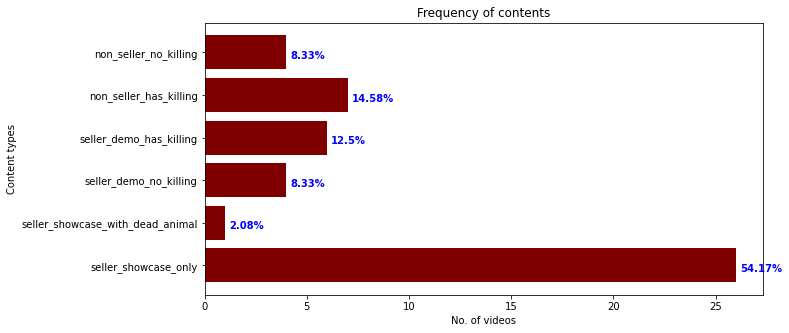

In [21]:
# bar plot of seller / non-seller contents
content_type_data = {}

for i in ['seller_showcase_only', 
          'seller_showcase_with_dead_animal', 
          'seller_demo_no_killing',
          'seller_demo_has_killing',
          'non_seller_has_killing',
          'non_seller_no_killing'
          ]:
  content_type_data[i] = frequency[i]

plt = dautils.bar_plot(
    data=content_type_data,
    xlabel="No. of videos",
    ylabel="Content types",
    title="Frequency of contents",
    orientation='horizontal'
)

# save image
utils.save_image(plt, visualization_folder_path, "seller_non_seller_content.jpg")

File is saved to seller_non_seller_frequency.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Content/seller_non_seller_frequency.jpg


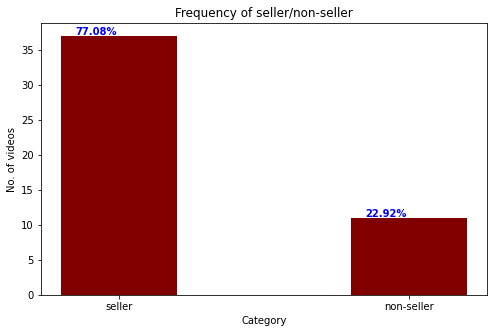

In [29]:
# seller/non-seller
seller_non_seller_data = {}
seller_non_seller_data['seller'] = frequency[category['seller']].sum()
seller_non_seller_data['non-seller'] = frequency[category['non-seller']].sum()

plt = dautils.bar_plot(
    data=seller_non_seller_data,
    xlabel="Category",
    ylabel="No. of videos",
    title="Frequency of seller/non-seller",
    figsize=(8,5)
)

# save image
utils.save_image(plt, visualization_folder_path, "seller_non_seller_frequency.jpg")

File is saved to killing_non_killing_frequency.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Content/killing_non_killing_frequency.jpg


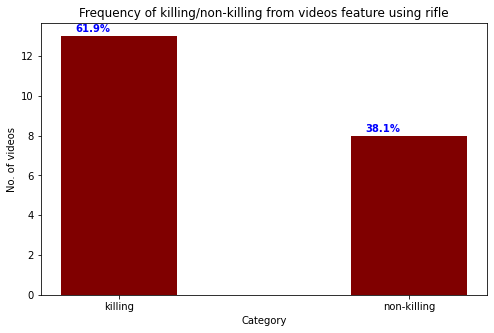

In [30]:
# killing / non-killing
killing_non_killing_data = {}
killing_non_killing_data['killing'] = frequency[category['killing']].sum()
killing_non_killing_data['non-killing'] = frequency[category['non-killing']].sum()

plt = dautils.bar_plot(
    data=killing_non_killing_data,
    xlabel="Category",
    ylabel="No. of videos",
    title="Frequency of killing/non-killing from videos feature using rifle",
    figsize=(8,5)
)

# save image
utils.save_image(plt, visualization_folder_path, "killing_non_killing_frequency.jpg")

File is saved to rifle_type_frequency.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Content/rifle_type_frequency.jpg


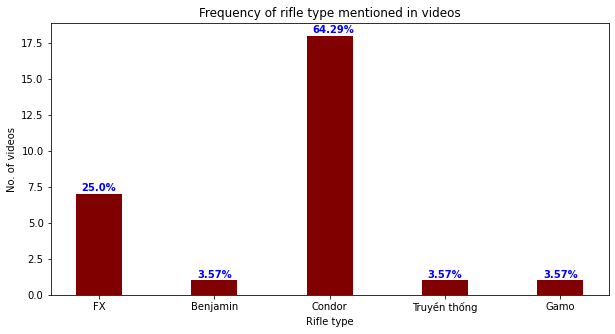

In [13]:
rifle_type_list = []
for i in data.rifle_type[data.rifle_type.notna()]:
  rifle_type_list += i.split(', ')

rifle_type_list = [s.strip() for s in rifle_type_list]

rifle_type_data = dautils.list_to_freq(rifle_type_list)

plt = dautils.bar_plot(
    data=rifle_type_data,
    xlabel="Rifle type",
    ylabel="No. of videos",
    title="Frequency of rifle type mentioned in videos"
)

# save image
utils.save_image(plt, visualization_folder_path, "rifle_type_frequency.jpg")